# Boletín 1


Primero creamos las funciones más genéricas posibles: la función que aproxima a una recta y a una parábola usando scipy optimaze. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 7

a) En este apartadp tenemos que obtener la línea Yrast de dos núcleos con A<100 y dos núcleos con A>150. Los núcleos elegidos son el $^{84}$Zr y el $^{86}$Zr para A<100, $^{156}$Eu y $^{156}$Eu para el A>150. 

Entonces lo primero que hacemos es seleccionar las energías de las diferentes excitaciones y asociarlas con los diferentes valores de espín. Como pertenencen a bandas rotacionales de núcleos par-par, todos los estados pertenecientes a la línea Yrast deben tener espín $I$ par con paridad $\pi = +$. Lo primero que hacemos es entrar en la lista de niveles de la nndc (*list of levels*) y elegir los que, para los estados $2^+,4^+...$ tienen el valor de energía más pequeño. En principio no nos vamos a fijar en nada más, ya que así es la definición de la línea Yrast. Es posible que existan estados con valores altos (por ejemplo, el $14^+$ o el $26^+$) que no pertecenzcan a bandas rotacionales (siendo excitaciones de partículas individuales o de bandas vibracionales), pero esto debería ser detectable en la propia gráfica del yrast, y mencionado posteriormente. Así pues, las líneas yrast son: 

In [5]:
# Escribamos los niveles:

I=np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52])
EZr84=np.array([0,539.92,1262.81,1887.91,2136.39,3088.97,4068.7,5135.9,6302.4,7498.0,8743.6,10175.5,11821.1,13666.3,15659.9,18032.4,20618,23180.0,26830.1])
IZr84=I[0:len(EZr84)]

EZr86=np.array([0,751.75,1666.57,2669.88,3298.44,4326.12,5524.3,6321.08,7396.46,8650.0,10142.9,12060.9,14149.0,16050,18063,20532])
IZr86=I[0:len(EZr86)]

EEu156=np.array([0,344.53,797.39,1340.86,1959.2,2633.1,3314.6,3836.7,4380.4,5006.6,5716.7,6489.3,7315.9,8082.2,8848.8,9647.9,10414.6,11097,12035.4,13202.5,13967.0,14421.6,15764])
IEu156=I[0:len(EEu156)]

EEu160=np.array([0,125.47,389.37,765.01,1229.68,1760.88,2845.79,2931.38,3465.43,4020.9,4660.8,5707.6,6175.1,7027.6,7929.0,8865.6,9825.6,10808.8,11820.0,12865.4,13952.4,15086.7,16273.0,17512.8,18797.1,20141.9])
IEu160=I[0:len(EEu160)]


Lo siguiente es representar la energía asociado a cada uno de lo espines (que es lo que viene siendo la línea yrast):

Text(0.5, 1.0, '$^{160}$Eu Yrast line')

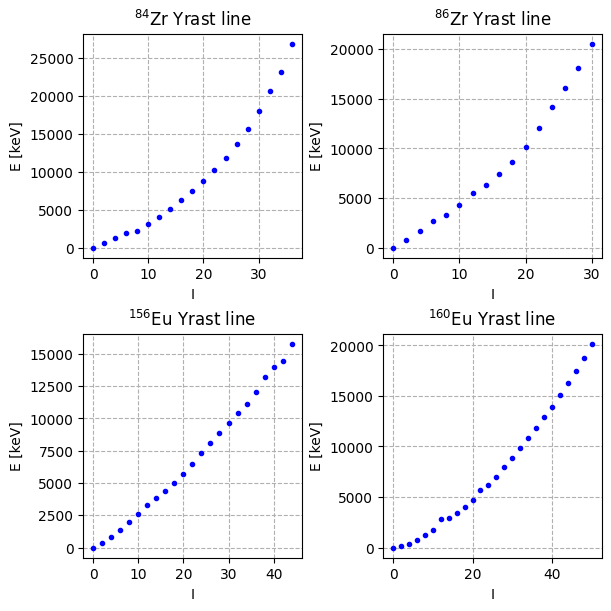

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6),layout='constrained')

axs[0,0].plot(IZr84,EZr84,".b")
axs[0,0].set_ylabel("E [keV]")
axs[0,0].set_xlabel("I")
axs[0,0].set_title("$^{84}$Zr Yrast line")
axs[0,0].grid(linestyle="--")
#axs[0,0].savefig("Yrast_Zr84.pdf")

axs[0,1].plot(IZr86,EZr86,".b")
axs[0,1].set_ylabel("E [keV]")
axs[0,1].set_xlabel("I")
axs[0,1].set_title("$^{86}$Zr Yrast line")
axs[0,1].grid(linestyle="--")
#axs[0,1].savefig("Yrast_Zr86.pdf")

axs[1,0].plot(IEu156,EEu156,".b")
axs[1,0].set_ylabel("E [keV]")
axs[1,0].set_xlabel("I")
axs[1,0].set_title("$^{156}$Eu Yrast line")
axs[1,0].grid(linestyle="--")
#axs[1,0].savefig("Yrast_Eu156.pdf")

axs[1,1].plot(IEu160,EEu160,".b")
axs[1,1].set_ylabel("E [keV]")
axs[1,1].grid(linestyle="--")
axs[1,1].set_xlabel("I")
axs[1,1].set_title("$^{160}$Eu Yrast line")
#axs[1,1].savefig("Yrast_Eu160.pdf")
#fig.savefig("Yrast_total.pdf")

b) En primer lugar tenemos que calcular el momento de inercia en función del cuadrado de la frecuencia. Para esto lo hacemos:

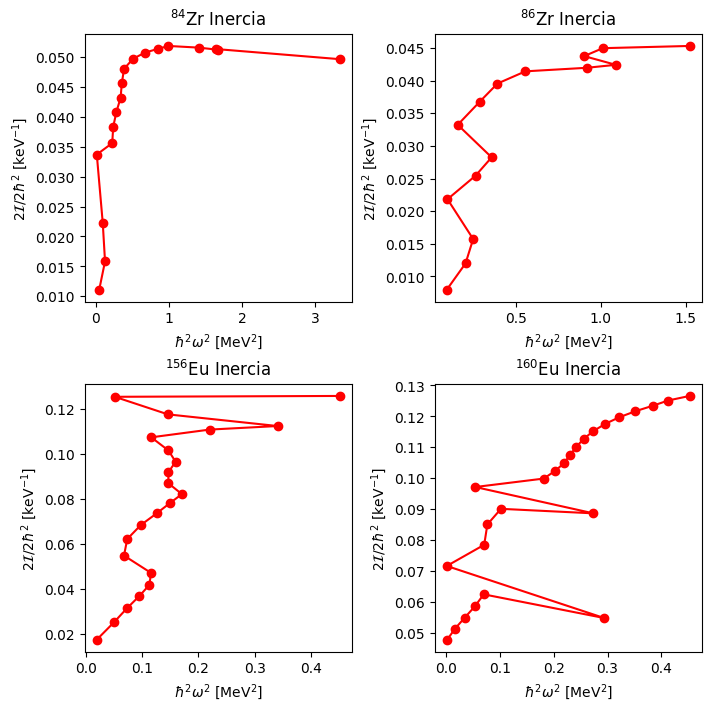

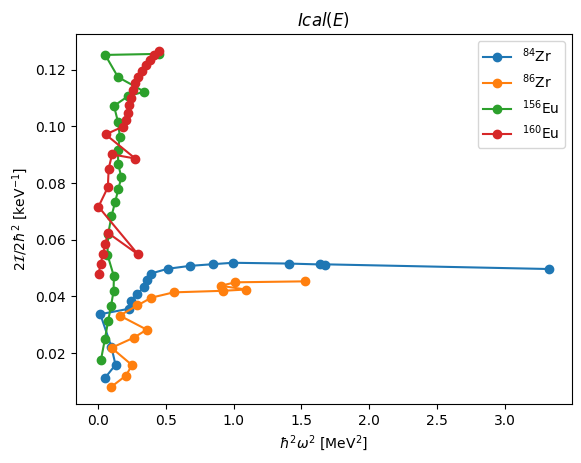

In [7]:
# Apartado b): calculo de I(omega):

E=[EZr84,EZr86,EEu156,EEu160]
I=[IZr84,IZr86,IEu156,IEu160]

nombres=np.array(["$^{84}$Zr","$^{86}$Zr","$^{156}$Eu","$^{160}$Eu"])
nombres2=np.array(["84Zr_inercia.pdf","86Zr_inercia.pdf","156Eu_inercia.pdf","160Eu_inercia.pdf"])
fig, axs = plt.subplots(2, 2, figsize=(7, 7),layout='constrained')
fig2 = plt.figure()
for i in range(len(E)//2):
    for j in range(len(E)//2):
        #print("E",E[i])
        #print("diff",aux)
        Eaux=E[2*i+j][1:]
        Iaux=I[2*i+j][1:]
        
        aux1=np.diff(E[i*2+j])/(1000)
        aux2=1/(np.sqrt(Iaux*(Iaux+1))-np.sqrt((Iaux-1)*(Iaux-2)))
        aux=aux1*(aux2)
        
        Inercia=(Iaux*(Iaux+1))/(Eaux)
        axs[i,j].plot(aux**2,Inercia,linestyle="-",color="red",marker="o")
        axs[i,j].set_xlabel("$\hbar^2 \\omega^2$ [MeV$^2$]")
        axs[i,j].set_ylabel("$2\\mathcal{I}/2\\hbar^2$ [keV$^{-1}$]")
        axs[i,j].set_title("%s Inercia"%nombres[2*i+j])
        plt.plot(aux**2,Inercia,linestyle="-",marker="o",label=nombres[2*i+j])

plt.xlabel("$\hbar^2 \\omega^2$ [MeV$^2$]")
plt.ylabel("$2\\mathcal{I}/2\\hbar^2$ [keV$^{-1}$]")
plt.title("$Ical(E)$")     
plt.legend()
fig.savefig(nombres2[i],bbox_inches='tight')


El apartado b) también nos dice que discutamos la aparición de *backbending* y que identifiquemos las bandas rotacionales. Primero definimos las funciones que hayen los parámetros de los cálculos.

In [8]:
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a + b * x
def quadratic_model(x, a, b):
    return a + b * x**2    
def linear_fit(x_data, y_data):
    params, _ = curve_fit(linear_model, x_data, y_data)
    return params  # Devuelve (a, b)
def quadratic_fit(x_data, y_data):
    params, _ = curve_fit(quadratic_model, x_data, y_data)
    return params  # Devuelve (a, b)

Y ahora hacemos una función que busque las zonas del E(I) que dejan de tener el comportamiento cuadrático anterior: 

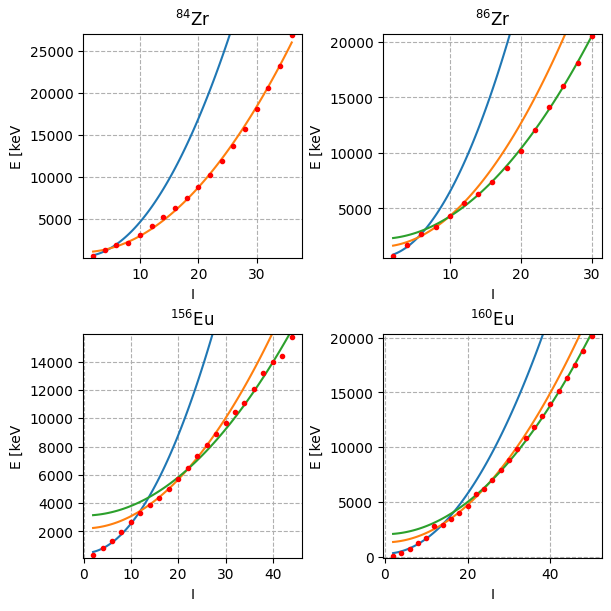

In [9]:
auxiliar=[[0,3],[0,3,6],[0,6,14],[0,8,13]]
fig, axs = plt.subplots(2, 2, figsize=(6, 6),layout='constrained')
for i in range(len(E)//2):
    for j in range(len(E)//2):
        aux=np.diff(E[i*2+j])/(2*1000)
        Eaux=E[2*i+j][1:]
        Iaux=I[2*i+j][1:]
        axs[i,j].set_xlabel("I")
        axs[i,j].set_ylabel("E [keV")
        axs[i,j].set_ylim(min(Eaux)-200,max(Eaux)+200)
        axs[i,j].set_title("%s"%nombres[2*i+j])
        axs[i,j].grid(linestyle="--")
        Iaux2=np.linspace(min(Iaux),max(Iaux),100)
        for k in range(len(auxiliar[2*i+j])-1):
            a,b=quadratic_fit(Iaux[auxiliar[2*i+j][k]:auxiliar[2*i+j][k+1]],Eaux[auxiliar[2*i+j][k]:auxiliar[2*i+j][k+1]])
            axs[i,j].plot(Iaux2,quadratic_model(Iaux2,a,b))
    
        a,b=quadratic_fit(Iaux[auxiliar[2*i+j][k]:],Eaux[auxiliar[2*i+j][k]:])
        axs[i,j].plot(Iaux2,quadratic_model(Iaux2,a,b))
        axs[i,j].plot(Iaux,Eaux,".r")

    

c) Los resultados esperados por un fluido y por un sólido vienen dadas por la ecuación 

$$ \mathcal{I}_{sol} = \frac{2}{5} A m R^2 \left[ 1 + \frac{\beta}{3} \left( 1 + 0.16 \beta  \right) \right] \qquad  \mathcal{I}_{flu} = \frac{9}{8\pi} \beta A m R^2   $$

Donde $R=r_0A^{1/3}$ tal que $r_0=1.2$ fm. Una de las razones por las que cogimos nucleo par-par es porque así podemos obtener los valores de la deformación cuadrupolar usando como base de datos:

$$ ^{84} \text{Zr}: \ \beta = 0.177(5)   \qquad ^{86} \text{Zr}: \ \beta =  0.148(14) \qquad ^{156} \text{Eu}: \ \beta = 0.189(3)  \qquad ^{160} \text{Eu}: \ \beta =  0.303(5) $$

Y usamos los siguientes defectos de masa para calcular $m$:

$$ ^{84} \text{Zr}: \ \Delta = -71422 \ [\text{keV}]   \qquad ^{86} \text{Zr}: \ \Delta =  -77969 \ [\text{keV}]  \qquad ^{156} \text{Eu}: \ \Delta = -64212 \ [\text{keV}]   \qquad ^{160} \text{Eu}: \ \Delta =  -66064 \ [\text{keV}]  $$


Así pues tenemos los siguientes resultados numéricos (queremos $2\mathcal{I}/\hbar^2$, por lo que tenemos que corregir las unidades): 

In [10]:
import scipy.constants as cte

beta = [0.177,0.148,0.189,0.303]
Z = [40,40,63,63]
A = [84,86,156,160]
Defecto_masa = [-71422,-77969,-64212,-66064]

def Isolid(Delta,beta,A,Z):
    R=10**(-12)*1.2*A**(1/3) # [m]
    m=((931.4941*1000) + Delta- Z*510.998950) # [keV/c²]
    m =  (cte.e/1000)*(1/cte.c**2)*m
    y = (2/5)*(A*m*R**2)*(1+(beta/3)*(1+0.16*beta)) # [kg*m²]
    return y


def Ifluid(Delta,beta,A,Z):
    m=((931.4941*1000) + Delta- Z*510.998950) # [keV/c²]
    m =  (cte.e/1000)*(1/cte.c**2)*m
    R=10**(-12)*1.2*A**(1/3) # [m]
    y = (9/(8*np.pi))*(A*m*beta*R**2) # [kg*m²]
    return y

Isol=np.zeros((4))
Iflu=np.zeros((4))
for i in range(len(beta)):
    Isol[i]=Isolid(Defecto_masa[i],beta[i],A[i],Z[i])*2/(cte.hbar**2) # Así lo doy en [1/J]
    Iflu[i]=Ifluid(Defecto_masa[i],beta[i],A[i],Z[i])*2/(cte.hbar**2) # Así lo doy en [1/J]
Isol=Isol*((cte.e*10**3))    
Iflu=Iflu*((cte.e*10**3))
print("Isol",Isol)
print("Isol",Iflu)


Isol [0.04245036 0.04338401 0.11894083 0.12855707]
Isol [0.00634186 0.00547189 0.01889838 0.03153311]


Los representamos en cada uno de los gráficos:

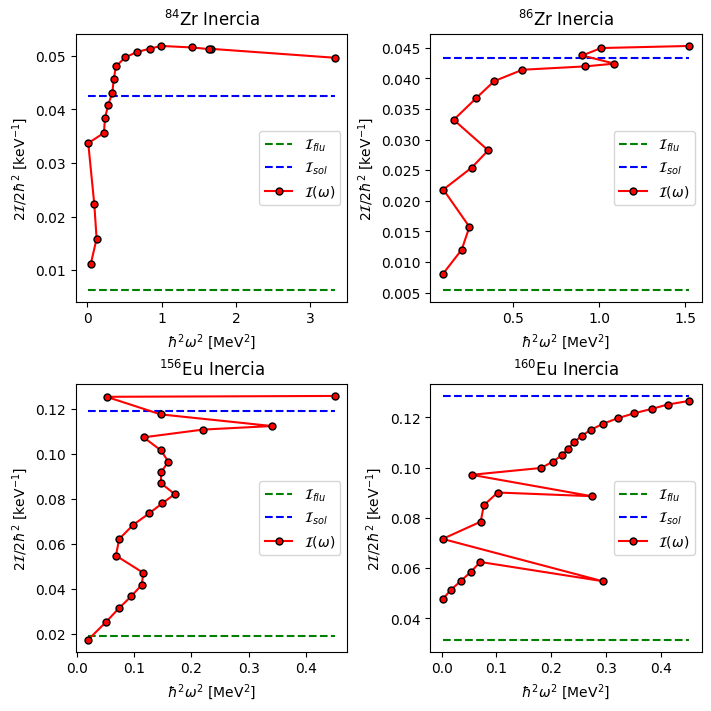

In [11]:
nombres=np.array(["$^{84}$Zr","$^{86}$Zr","$^{156}$Eu","$^{160}$Eu"])
nombres2=np.array(["84Zr_inercia.pdf","86Zr_inercia.pdf","156Eu_inercia.pdf","160Eu_inercia.pdf"])
fig, axs = plt.subplots(2, 2, figsize=(7, 7),layout='constrained')
for i in range(len(E)//2):
    for j in range(len(E)//2):
        #print("E",E[i])
        #print("diff",aux)
        Eaux=E[2*i+j][1:]
        Iaux=I[2*i+j][1:]
        
        aux1=np.diff(E[i*2+j])/(1000)
        aux2=1/(np.sqrt(Iaux*(Iaux+1))-np.sqrt((Iaux-1)*(Iaux-2)))
        aux=aux1*(aux2)
        
        Inercia=(Iaux*(Iaux+1))/(Eaux)
        axs[i,j].plot([min(aux**2),max(aux**2)],[Iflu[i*2+j]]*2,color="green",linestyle="--",label="$\mathcal{I}_{flu}$")
        axs[i,j].plot([min(aux**2),max(aux**2)],[Isol[i*2+j]]*2,color="blue",linestyle="--",label="$\mathcal{I}_{sol}$")
        axs[i,j].plot(aux**2,Inercia,linestyle="-",color="red",marker="o",markeredgecolor="black",
                      markersize=5,markerfacecolor="red",label="$\mathcal{I}(\omega)$")
        axs[i,j].set_xlabel("$\hbar^2 \\omega^2$ [MeV$^2$]")
        axs[i,j].set_ylabel("$2\\mathcal{I}/2\\hbar^2$ [keV$^{-1}$]")
        axs[i,j].set_title("%s Inercia"%nombres[2*i+j])
        axs[i,j].legend()

d) Ahora tenemos que buscar las bandas vibracionales. Como sabemos los fonones cargan una energía de $n\hbar \omega$ siendo $n$ el número de excitación. Consecuentemente, si la energía de un estado $2^+$ viene dada por una exitación fonónica $E(2^+)=\hbar \omega$, debería ocurrir que la siguiente excitación $4^+$ (del mismo modo de vibración) verique $E(4^+)=2\hbar \omega$. Así pues, la relación 

$$ \frac{E(4^+)}{E(2^+)} \approx 2 $$
Para la exitación de tercer podríamos encontrar un $E(6^+)$ tal que:

$$ \frac{E(6^+)}{E(2^+)} \approx 3 $$
Lógicamente podríamos buscar vibraciones de un fonón en $0^+$ y en $2^+$, o vibraciones de dos fonones en $4^+$ o $2^+$. Sin embargo

Así pues, busquemos tanto el $^{84}$Zr y $^{86}$Zr. En el $^{84}$Zr podemos ver que los valores con $E(2^+)$ y con $E(4^+)$ que mejor verifican dichas relaciones son los mismos que hemos usado, tal que:

$$ ^{84} \text{Zr}: \ E(2^+)=539.92 \ \text{keV} \quad E(4^+)=1262.81 \quad E(6^+)=1887.91  \ \text{keV} E(8^+)=2136.39  \ \text{keV}  $$
tal que podemos ver que:

$$ ^{84} \text{Zr}: \frac{E(4^+)}{E(2^+)} = 2.34 \quad \frac{E(6^+)}{E(2^+)} = 3.50 \quad  \frac{E(8^+)}{E(2^+)} = 3.96 $$
En el $^{86}$Zr ocurre un poco lo mismo:

$$ ^{86} \text{Zr}: \ E(2^+)=751.75 \ \text{keV} \quad E(4^+)=1666.57 \quad E(6^+)=2669.88  \ \text{keV} E(8^+)=3298.44  \ \text{keV}  $$
tal que podemos ver que:

$$ ^{86} \text{Zr}: \frac{E(4^+)}{E(2^+)} = 2.22 \quad \frac{E(6^+)}{E(2^+)} = 3.55 \quad  \frac{E(8^+)}{E(2^+)} = 4.39 $$
Estas serían las mejores candidatas a *bandas rotacionales* que tenemos para nuestros dos átomos. 

In [12]:

print("Energías del siguiente 84Zr")
print(1262.81/539.92)
print(1887.91/1262.81)
print(1887.91/539.92)
print(2136.9/539.92)
print("Energías del siguiente 86Zr")
print(1666.57/751.75)
print(2669.88/1666.57)
print(2669.88/751.75)
print(3298.44/751.75)

Energías del siguiente 84Zr
2.3388835383019706
1.4950071665571227
3.496647651503927
3.9578085642317387
Energías del siguiente 86Zr
2.216920518789491
1.6020209172131985
3.5515530428999003
4.387682075157965


# Ejercicio 8

Aquí tenemos que aplicar la correción de Strutinsky a nuestros núcleos dados. Primero vamos a realizar la representación en bandas de estos núcleos:

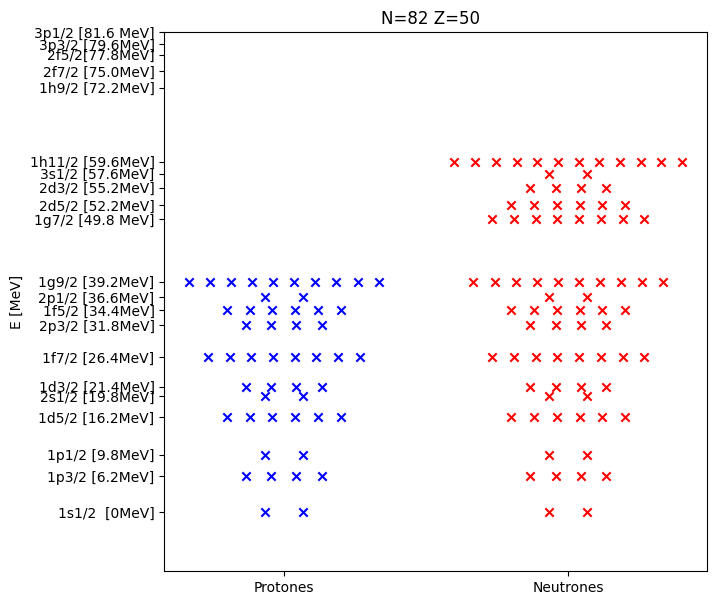

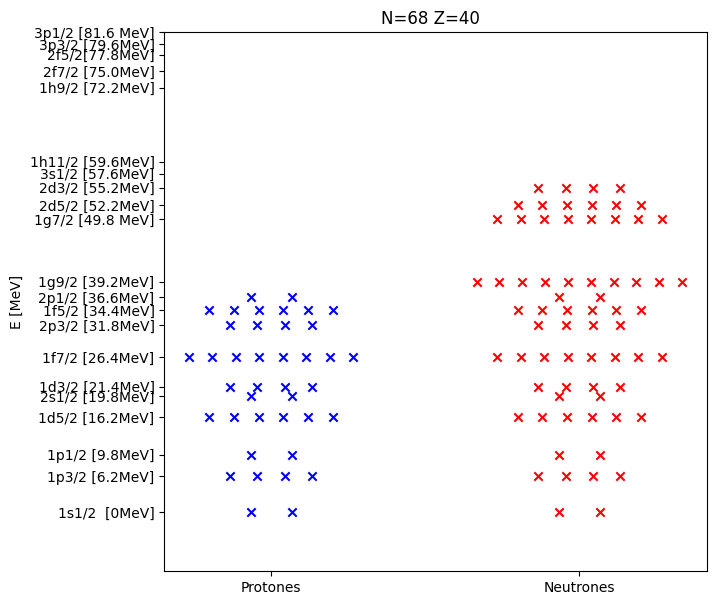

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from scipy.special import erf
import pandas as pd 

# Creación de nuestro colocador de bandas, para dados N y Z nos diga cuales son sus bandas

Energias=np.array([0,6.2,9.8,16.2,19.8,21.4,26.4,31.8,34.4,36.6,39.2,49.8,52.2,55.2,57.6,59.6,72.2,75.0,77.8,79.6,81.6])
Degeneracion=np.array([2,4,2,6,2,4,8,4,6,2,10,8,6,4,2,12,10,8,6,4,2])
Nombre=["1s1/2  [0MeV]","1p3/2 [6.2MeV]","1p1/2 [9.8MeV]","1d5/2 [16.2MeV]",    "2s1/2 [19.8MeV]",  "1d3/2 [21.4MeV]",    "1f7/2 [26.4MeV]", 
        "2p3/2 [31.8MeV]",   "1f5/2 [34.4MeV]",    "2p1/2 [36.6MeV]",   "1g9/2 [39.2MeV]",    "1g7/2 [49.8 MeV]", 
        "2d5/2 [52.2MeV]",    "2d3/2 [55.2MeV]",    "3s1/2 [57.6MeV]",    "1h11/2 [59.6MeV]",    "1h9/2 [72.2MeV]",  
        "2f7/2 [75.0MeV]",    "2f5/2[77.8MeV]",     "3p3/2 [79.6MeV]",    "3p1/2 [81.6 MeV]"]



def Crea_Bandas(Z,N):
    sumando=0
    aux2=0
    aux3=0
    plt.figure(figsize=(7,7))
    i=0
    flag=True

    while (i<len(Energias) and flag):   
        if (Z<sum(Degeneracion[0:i+1])):
            aux2=Z-sum(Degeneracion[0:i])+Degeneracion[i]
            flag=False
            
        entero_aux=Degeneracion[i]
        
        aux01=np.array((entero_aux-aux2)*[Energias[i]])
        
        minimo=1+(12-Degeneracion[i])*(4/24)
        maximo=5-(12-Degeneracion[i])*(4/24)

        
        plt.scatter(np.linspace(minimo,maximo,Degeneracion[i]-aux2),aux01,color="blue",marker="x")
        i+=1
    flag=True    
    i=0
    while (i<len(Energias) and flag):   
        if (N<sum(Degeneracion[0:i+1])):
            aux3=N-sum(Degeneracion[0:i])+Degeneracion[i]
            flag=False
            
        entero_aux=Degeneracion[i]
        aux02=np.array((entero_aux-aux3)*[Energias[i]])
        
        minimo=1+(12-Degeneracion[i])*(4/24)
        maximo=5-(12-Degeneracion[i])*(4/24)

        plt.scatter(np.linspace(5+minimo,5+maximo,Degeneracion[i]-aux3),aux02,color="red",marker="x",)

        i+=1
        
    plt.ylabel("E [MeV]")
    plt.xticks([3,8],["Protones","Neutrones"])
    plt.yticks(Energias,Nombre)
    plt.ylim(-10,max(Energias))
    plt.ylim(-10,max(Energias))
    plt.title("N=%i Z=%d  "%(N,Z))
    plt.savefig("N%s_Z%s_Bandas.pdf"%(N,Z), bbox_inches='tight')
    
Crea_Bandas(50,82)
Crea_Bandas(40,68)    





Como podemos ver, para el núcleo Z=50 y N=82 tenemos que dos números mágicos. Para el núcleo Z=40 y N=68 no tenemos números mágicos, aunque si capas llenas. Esto significa que deberían ser núcleos con cierta estabilidad. La correción de Strutinsky predecería entonces que $$ \delta E_{\text{shell}} = E_{\text{shell}} - \tilde{E}_{\text{shell}}$$ sea negativa, por lo menos, cerca de los números mágicos. Lo primero que tenemos que hacer es calcular $\tilde{\lambda}_F$ lo cual se hace a través de la siguiente fórmula $$ A = \int_{-\infty}^{\tilde{\lambda}_F} \tilde{g( \varepsilon )} d \varepsilon \qquad g( \varepsilon ) = \frac{1}{\sqrt{\pi \gamma}} \sum_i \exp\left[ - \frac{(\varepsilon_i-\varepsilon)^2}{\gamma^2} \right]$$
siendo $A$ el número de protones o neutrones. Tenemos que resolver independientemente el problema para los protones y neutrones, para luego sumarlos a la hora de considerar el núcleo global. Lógicamente, al tener integrales no analíticas, la única forma de resolver el problema es hacerlo de manera computacional. Así pues, primero calculamos $\tilde{\lambda}_F$ para cada uno de los Z y N, con diferentes $\gamma$ (en particular 1,2,10,20):

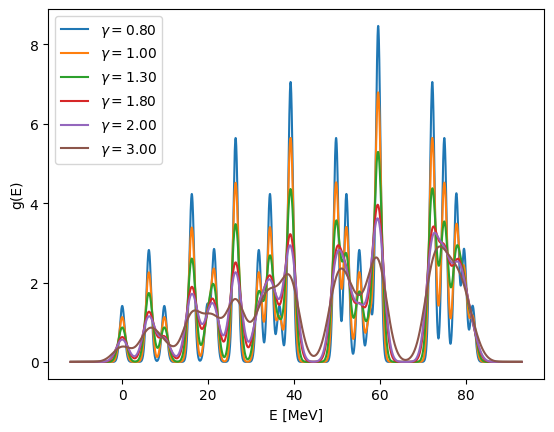

In [7]:
# Funcinoes auxiliares para resolver el ejercicio. Contienen la exponencial y el interior de la exponencial:
def f(x,gamma,Ei):
    return (x-Ei)/(gamma) 
def g(E,Ei,gamma):
    return (np.exp(-(f(E,gamma,Ei))**2))/(np.sqrt(np.pi)*gamma)

# Array de energías
E=np.linspace(-12,93,50000)
plt.figure()

# Función que guarda una gráfica y nos dice cual es lambda shift (energía de Fermi modificada)
# Para esto lo que vamos a hacer es sumar las áreas hasta que llege a un valor buscado

from scipy.integrate import simpson

def ge(gamma,Area):
    y=np.zeros(len(E))
    z=np.zeros(len(E))
    
    # Aquí estamos dando valor g(E)

    for i in range(len(Degeneracion)):
        z+=g(E,Energias[i],gamma)*Degeneracion[i]
            
    if Area<42:
        plt.plot(E,z,label="$\gamma=%.2f $"%gamma)
        plt.legend()
        plt.xlabel("E [MeV]")
        plt.ylabel("g(E)")
    suma=0
    flag=True
  #  h = E[1]-E[0]
    j=int(2300*(len(E)/5000))
    while(flag):
        suma = simpson(z[:j],E[:j]) 
      #  suma += (h / 2) * (z[0] + 2 * np.sum(z[1:j-1]) + z[j-1])
        if (suma>Area):
            flag=False
        else:
            j+=5
            suma=0
   # print(j)        
    return E[j]

# Gamma que queremos probar, en las areas ponemos Z y N     
    
gamma=[0.8,1,1.3,1.8,2,3]
Area=np.array([50,82,40,68])

energia=np.zeros((len(gamma),len(Area)))

for k in range(len(Area)):
    for i in range(len(gamma)):
        energia[i,k]=ge(gamma[i],Area[k])
        
plt.savefig("ge.pdf")
        
    

In [9]:
# # Valores de lambda shift:
print(energia)    

# En Eshell las no modificadas, en Eshell2 las modificadas por las gaussianas
Eshell=np.zeros((len(Area)))
Eshell2=np.zeros((len(gamma),len(Area)))

# Calculamos las energías no modificadas
# Esto lo podemos hacer así solo porque las capas están llenas:

gamma=[0.8,1,1.3,1.8,2,3]
Area=[50,82,40,68]
E=np.linspace(-12,93,50000)
print("E",E)    
for i in range(len(Area)):
    flag=True
    j=1
    while(flag):
        if (Area[i]==sum(Degeneracion[:j])):
            flag=False
        else:
            j+=1
    Eshell[i]=np.dot(Energias[:j],Degeneracion[:j]) 
    #Eshell[i]=sum(Energias[:j]) 
for i in range(len(Area)):
    for j in range(len(gamma)):
        E=np.linspace(-10,energia[j,i],3001)
        for k in range(len(Energias)):
            y =  E*g(E,Energias[k],gamma[j])*Degeneracion[k]  # Valores de la función en esos puntos 
            Eshell2 [j,i]+= simpson(y,E)
            #n=len(E)
            #h = E[1]-E[0]
            #Eshell2[j,i] += (h / 2) * (y[0] + 2 * np.sum(y[1:n-1]) + y[n-1])
                                       
print("Eshel=",Eshell)
print("Eshel2=",Eshell2)  
for i in range(len(Eshell2)):
    print("*******************************")
    print("gamma=",gamma[i])
    for j in range(len(Eshell2[0])):
        print("Para el Z=%i tenemos un valor de deltaE = %.2f"%(Area[j],Eshell[j]-Eshell2[i,j]))
              
            

[[45.34164683 67.7700954  37.73949479 56.48236965]
 [44.52263045 66.63607272 37.65549311 56.52437049]
 [44.52263045 65.92205844 37.50849017 56.57687154]
 [44.54363087 65.93255865 37.28798576 56.60837217]
 [44.54363087 65.93255865 37.2249845  56.58737175]
 [44.58563171 65.96405928 37.02548051 56.36686734]]
E [-12.         -11.99789996 -11.99579992 ...  92.99579992  92.99789996
  93.        ]
Eshel= [1276.8 3039.6  884.8 2209.2]
Eshel2= [[1276.8        3039.6         884.97698279 2209.259641  ]
 [1276.8        3039.6         885.06757645 2209.47439249]
 [1276.8000001  3039.6         884.65893271 2209.15872632]
 [1276.80040378 3039.60001966  884.16959987 2209.04531092]
 [1276.80027995 3039.60007087  884.2135483  2209.003954  ]
 [1276.77128933 3039.59560886  881.52508099 2206.36505753]]
*******************************
gamma= 0.8
Para el Z=50 tenemos un valor de deltaE = -0.00
Para el Z=82 tenemos un valor de deltaE = -0.00
Para el Z=40 tenemos un valor de deltaE = -0.18
Para el Z=68 tenemo